### Part 8 - Debugging Broken Functions

In [1]:
# Step 1: Import python package

from jworkflow_pkg.data import get_bdata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn')
%matplotlib inline

bdata = get_bdata()

In [2]:
# Step 2: Conduct Pivot Table on Data

pivoted = bdata.pivot_table('Total', index=bdata.index.time, columns=bdata.index.date)

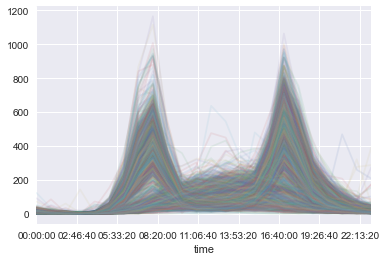

In [3]:
# Step 3: Plot pivot table data
## Here we see the data doesn't have the two peaks, but instead just one...This is what we need to fix

pivoted.plot(legend=False, alpha=0.1)

In [4]:
# Step 4: Investigate the data
# This shows that there are now only 12 unique times b/c the AM and PM are no longer there

np.unique(bdata.index.time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

In [5]:
# Step 5: Time to review data.py file and review where function went wrong...

## Review the first 24 entries of the fremont.csv file
## This displays the time is 12 hours and not 24, which means our strftime; We need to use I instead of H

!head -24 fremont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146
10/03/2012 09:00:00 AM,172,104
10/03/2012 10:00:00 AM,72,46
10/03/2012 11:00:00 AM,10,32
10/03/2012 12:00:00 PM,35,41
10/03/2012 01:00:00 PM,42,48
10/03/2012 02:00:00 PM,77,51
10/03/2012 03:00:00 PM,72,92
10/03/2012 04:00:00 PM,133,182
10/03/2012 05:00:00 PM,192,391
10/03/2012 06:00:00 PM,122,258
10/03/2012 07:00:00 PM,59,69
10/03/2012 08:00:00 PM,29,51
10/03/2012 09:00:00 PM,25,38
10/03/2012 10:00:00 PM,24,25


In [6]:
# Step 6: Create test to ensure this time format error doesn't occur again...

## via $ nano jworkflow_pkg/tests/test_data.py
## assert len(np.unique(bdata.index.time)) == 24 -> counts the length to suggests there are 24 unique hours

### Part 8.5 - Finding and Fixing SKlearn Bugs

In [7]:
# Step 7: Display the shape of the pivoted data

pivoted.shape

(24, 2036)

In [8]:
# Step 7: Display the shape of the pivoted data transposed
## Think in terms of 2036 observations and each observation includes 24 hours (i.e features)
## Review the PCA - Principal Component Analysis from sklearn

pivoted.T.shape

(2036, 24)

In [9]:
# Step 8: import PCA

from sklearn.decomposition import PCA
import sklearn

In [10]:
# Step 9: Convert pivoted into numpy array
## Use fillna(0) to fill in missing data

X = pivoted.fillna(0).T.values
X.shape

(2036, 24)

In [11]:
# Step 10: Conduct PCA to limit features to 2
## (optional) use svd_solver='dense'

PCA(2).fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
# Step 11: Try fitting the two-dimensional X value

X2 = PCA(2).fit_transform(X)

In [13]:
X2

array([[ 323.20598976,   -6.60657452],
       [ 246.94602832,   37.10569615],
       [ 145.53774986,   44.00136806],
       ...,
       [-599.14689284,  -88.91384482],
       [-509.0091151 ,  135.83790196],
       [ 416.1359036 ,  -88.00691369]])

In [14]:
# Side Conversation - Opening Pull Request in SciPy

## Step 1: Navigate to Repo
## Step 2: $ git pull upstream master -> gets us up-to-date with master repo
## Step 3: $ git checkout - b fix-pca-validation -> Creat new branch to fix element
## Step 4: Navigate file in question and update section of code with issue and save
## Step 5: $ git status -> This confirms what we modified
## Step 6: Provided notes for pull request "BUG: fix x, y, z and a, b c"
## Step 7: $ git log -> to review the notes were updated
## Step 8: $ git push origin NameOfBranchToFixBugError -> This pushes branch to main repo for review and approval
## Step 9: Review recent changes on Github

### Part 9 - Data Exploration and practice with PCA and GMM

In [15]:
### Step 12: Review the two-dimensional array created from the PCA

X2.shape

(2036, 2)

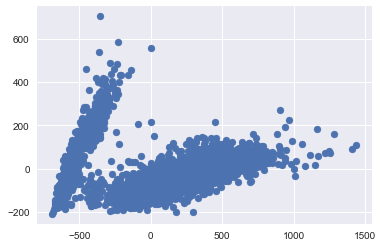

In [16]:
### Step 13: Create a scatter plot to compare the two data sets

## The clusters suggests 2 unique type of days

plt.scatter(X2[:, 0], X2[:,1])

In [17]:
### Step 14: Import Gaussian Mixture model to investigate the PCA plot

## Specify 2 -> for two clusters

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)

In [18]:
### Step 15: Fit the model and then make predictions
## The labels will identify if we are in the 0 or 1 cluster

gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 0, 1])

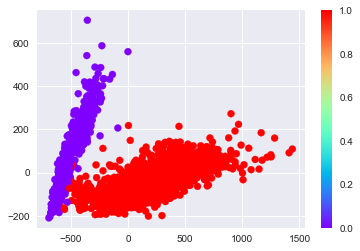

In [19]:
### Step 16: Reproduce the scatter plot with divider of labels
## Provides clear separation of clusters

plt.scatter(X2[:, 0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

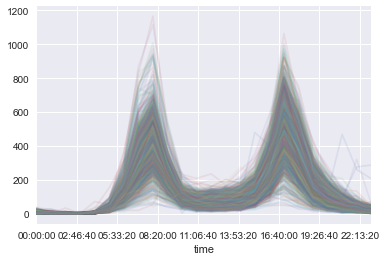

In [20]:
### Step 17: Dissect just a portion of the data
## The red cluster has a high peak commuter pattern displayed (Commute days)

pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1)

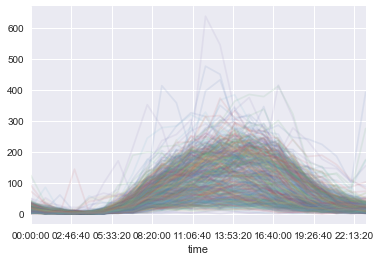

In [21]:
### Step 18: Dissect just a portion of the data
## The purple cluster has a more even distribution (Non-commute days)

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1)

#### Investigate if the two segments are divided by weekdays and weekends

In [22]:
### Step 19: Convert dates into days of the week 

# a) convert object into DatetimeIndex
pd.DatetimeIndex(pivoted.columns)

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-06',
               '2012-10-07', '2012-10-08', '2012-10-09', '2012-10-10',
               '2012-10-11', '2012-10-12',
               ...
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', length=2036, freq=None)

In [24]:
### Step 20: Use the day of week attribure of the datetime64 object 

dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

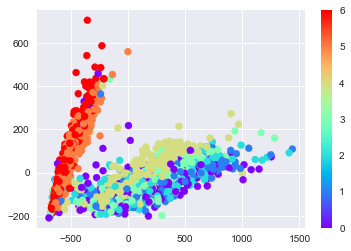

In [25]:
### Step 21: Plot the graph with day of week as coloration


plt.scatter(X2[:, 0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

In [26]:
### Step 22: Look deeper into the data for non-weekdays that look like non-commute days
## We see the a pattern of mostly holidays


dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01'],
              dtype='datetime64[ns]', freq=None)